# The use of GenAI in the Games Industry
Analyzing and visualizing our survey data


## Setup
First we import needed libraries and our data from a .xlsx file.


In [51]:
# package for data manipulation including ggplot2
library(tidyverse)

# package for reading excel files
library(readxl)

# lessR package that I read about
library(lessR)

library(reshape2)
library(ggcorrplot)

library(wordcloud)
library(tm)



# read the excel file
data <- read_excel("data/surveyData20240419.xlsx")


## What is the data?
Now let's count the rows (number of respondents) and list the collumns (questions).

In [52]:
# count the number of rows (people) and columns (answers)
dim(data)

# store the column names in columnNames
columnNames <- names(data)

# change the column names to be numbers
names(data) <- c(1:ncol(data))

# list the new column names with the old names stored in columnNames
print(columnNames, names(data))


[1] 304  74

 [1] "ID"                                                                                                       
 [2] "Start time"                                                                                               
 [3] "Completion time"                                                                                          
 [4] "Email"                                                                                                    
 [5] "Name"                                                                                                     
 [6] "Do you consider yourself a professional or hobbyist in Gamee"                                             
 [7] "What is the size of the team?"                                                                            
 [8] "What department(s) do you work in? Check all that applies."                                               
 [9] "Do you utilize Generative AI in your work? Eg. ChatGPT, Midjourney, Copilot etc."         

## Proffesionals vs Hobbyists
Now let's compare the proffesionals and the hobbyists.

### Distribution

22,n,percentage
<chr>,<int>,<dbl>
Hobbyist,200,65.78947
Professional,104,34.21053


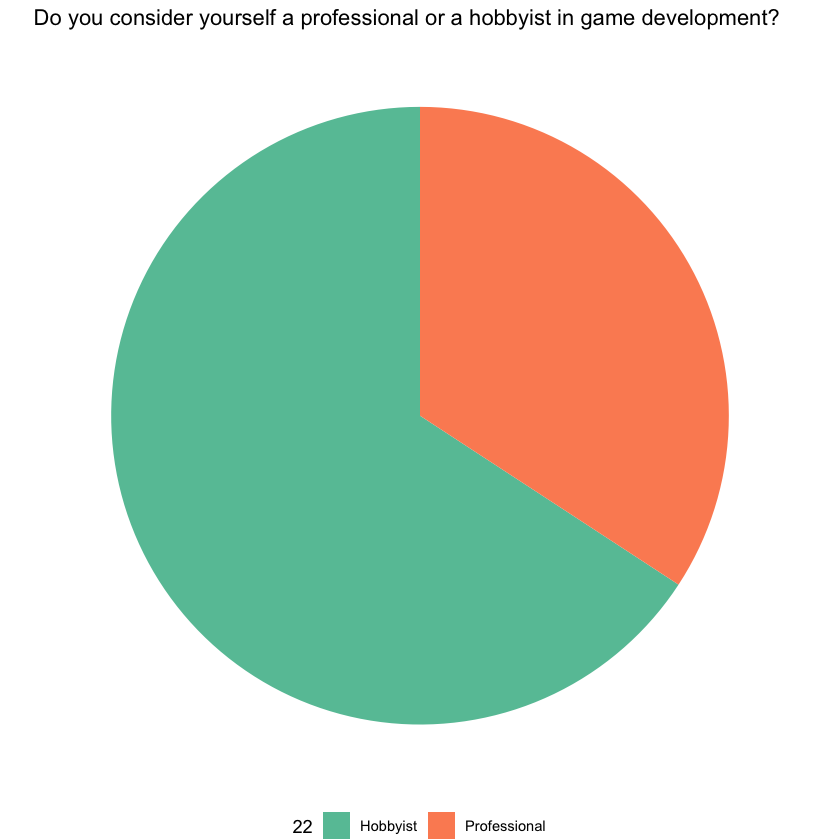

In [53]:
# Show the percentage of Do you consider yourself a professional or a hobbyist in game development?
data %>%
  count(`22`) %>%
  mutate(percentage = n / sum(n) * 100)

# Make a pie chart of the data
data %>%
  count(`22`) %>%
  ggplot(aes(
    x = "", y = n, fill =
      `22`
  )) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) +
  theme_void() +
  theme(legend.position = "bottom") +
  labs(title = "Do you consider yourself a professional or a hobbyist in game development?") +
  scale_fill_brewer(palette = "Set2")


### Do they use GenAI?

45,n,percentage
<chr>,<int>,<dbl>
No,186,61.18421
Yes,118,38.81579


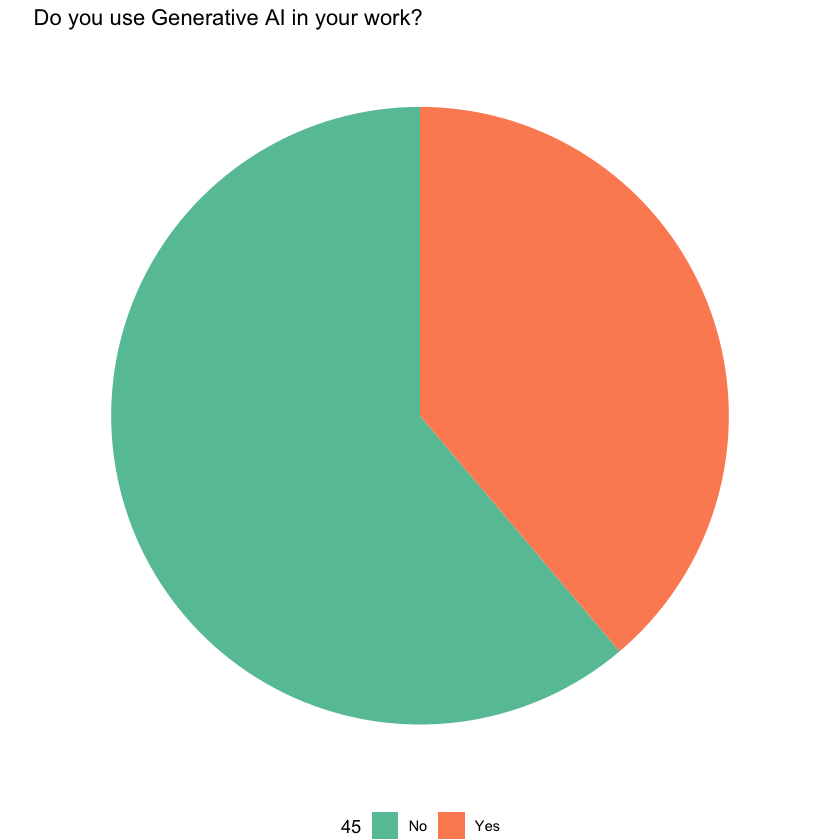

In [54]:
# Show the percentage of Do you use Generative AI in ypur work?
data %>%
  count(`45`) %>%
  mutate(percentage = n / sum(n) * 100)

# Make a pie chart of the data
data %>%
  count(`45`) %>%
  ggplot(aes(x = "", y = n, fill = `45`)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) +
  theme_void() +
  theme(legend.position = "bottom") +
  labs(title = "Do you use Generative AI in your work?") +
  scale_fill_brewer(palette = "Set2")


22,45,n,percentage
<chr>,<chr>,<int>,<dbl>
Hobbyist,No,127,63.50000
Hobbyist,Yes,73,36.50000
Professional,No,59,56.73077
Professional,Yes,45,43.26923


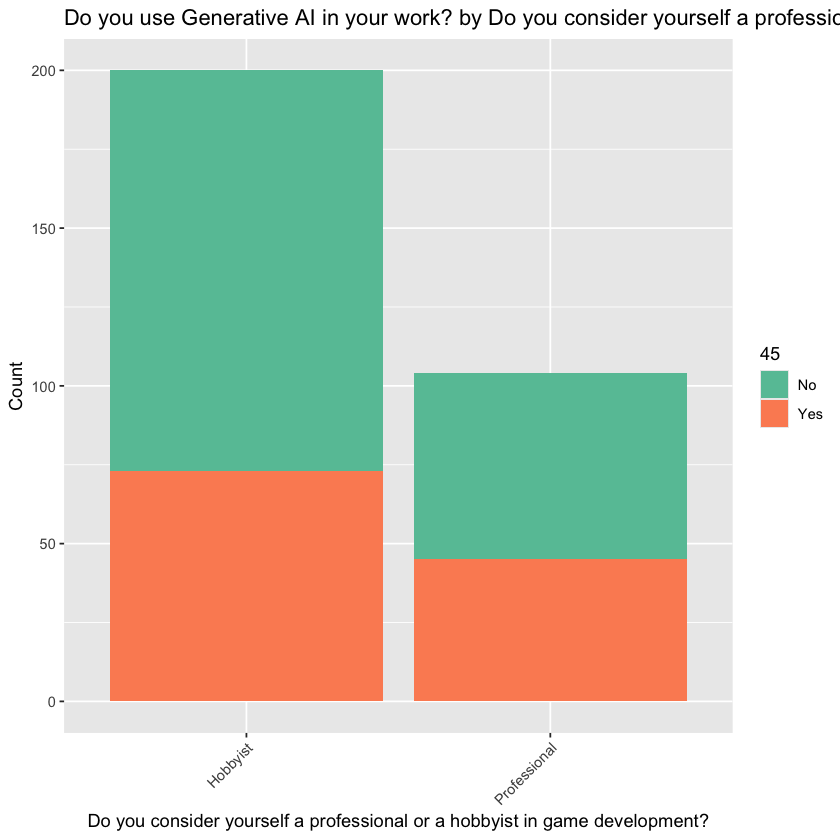

In [55]:
# Show the percentage of Do you use Generative AI in your work? by
# Do you consider yourself a professional or a hobbyist in game development?
data %>%
  count(
    `22`,
    `45`
  ) %>%
  group_by(`22`) %>%
  mutate(percentage = n / sum(n) * 100)

# Make a stacked bar chart  with percentage as y axis of Do you use Generative AI in your work? by
# Do you consider yourself a professional or a hobbyist in game development?
data %>%
  count(
    `22`,
    `45`
  ) %>%
  ggplot(aes(
    x = `22`,
    y = n,
    fill = `45`
  )) +
  geom_bar(stat = "identity") +
  labs(
    title = "Do you use Generative AI in your work? by Do you consider yourself a professional or a hobbyist in game development?",
    x = "Do you consider yourself a professional or a hobbyist in game development?",
    y = "Count"
  ) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_brewer(palette = "Set2")


### Overall stance on GenAI

31,n,percentage
<fct>,<int>,<dbl>
Very negative,81,26.64474
Negative,60,19.73684
Neutral,62,20.39474
Positive,62,20.39474
Very positive,39,12.82895


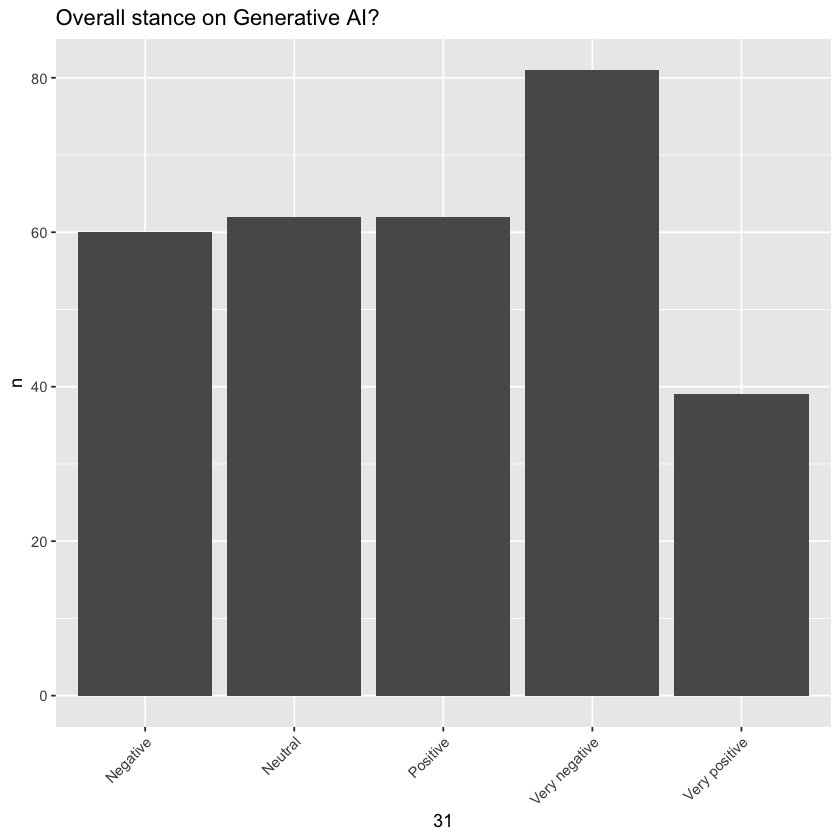

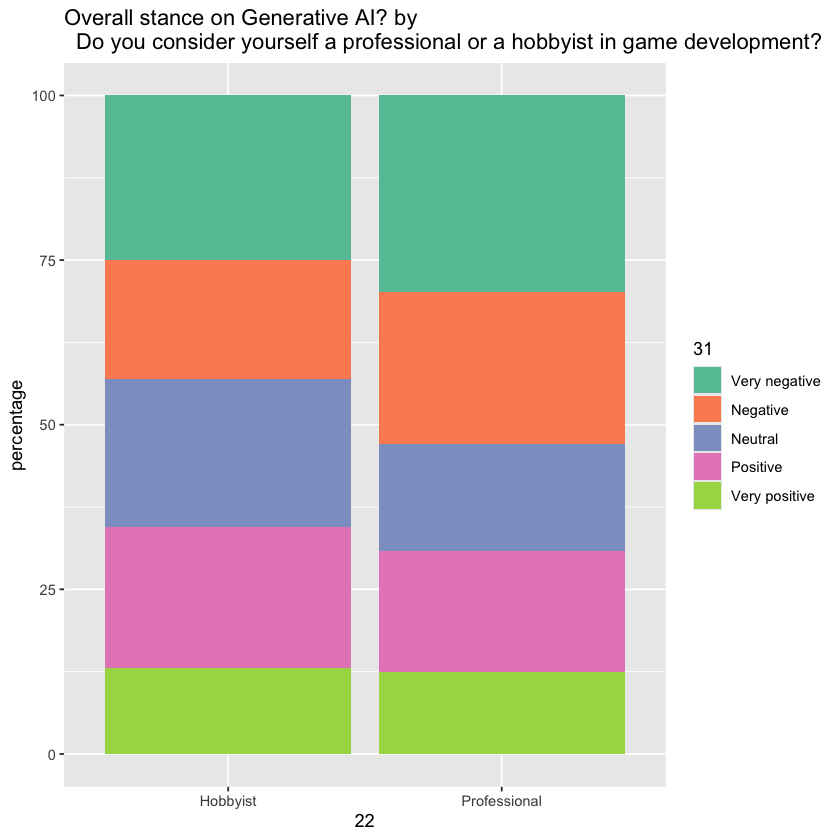

In [56]:
# Show the data from the likert scale question Overall stance on Generative AI?
# And order it from left to right "Very negative", "Negative", "Neutral", "Positive", "Very positive"
data %>%
  count(`31`) %>%
  mutate(percentage = n / sum(n) * 100) %>%
  mutate(`31` = factor(
    `31`,
    levels = c("Very negative", "Negative", "Neutral", "Positive", "Very positive")
  )) %>%
  arrange(`31`)

# Make a chart of the data
data %>%
  count(`31`) %>%
  mutate(`Column2` = factor(
    `31`,
    levels = c("Very negative", "Negative", "Neutral", "Positive", "Very positive")
  )) %>%
  ggplot(aes(x = `31`, y = n)) +
  geom_bar(stat = "identity") +
  labs(title = "Overall stance on Generative AI?") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_x_discrete(
    breaks = c("Very negative", "Negative", "Neutral", "Positive", "Very positive"),
    labels = c("Very negative", "Negative", "Neutral", "Positive", "Very positive")
  )

# Take the above data and make a stacked bar chart by
# Do you consider yourself a professional or a hobbyist in game development?
# And show the y-axis as a percentage and order it from "Very negative", "Negative", "Neutral", "Positive", "Very positive"
data %>%
  count(
    `22`,
    `31`
  ) %>%
  group_by(`22`) %>%
  mutate(percentage = n / sum(n) * 100) %>%
  mutate(`31` = factor(
    `31`,
    levels = c("Very negative", "Negative", "Neutral", "Positive", "Very positive")
  )) %>%
  ggplot(aes(
    x = `22`,
    y = percentage, fill = `31`
  )) +
  geom_bar(stat = "identity", position = "stack") +
  labs(title = "Overall stance on Generative AI? by
  Do you consider yourself a professional or a hobbyist in game development?") +
  scale_fill_brewer(palette = "Set2")


## Years of professional experience

### Does experience change attitudes towards GenAI?

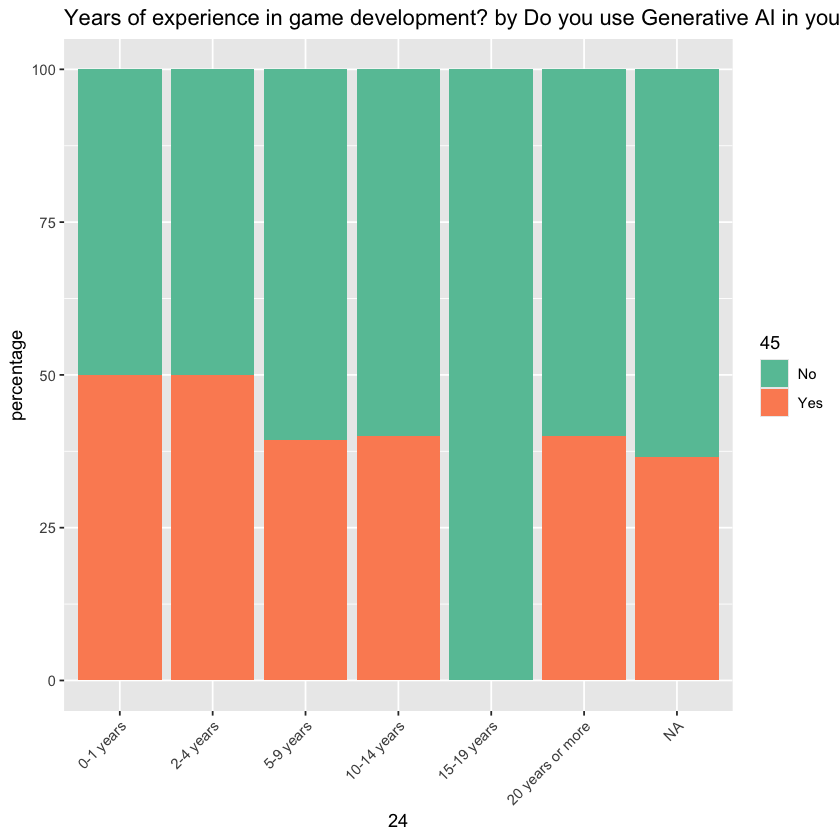

In [57]:
# Make a stacked barchart showing Years of experience in game development? by Do you use Generative AI in your work? in percentages
# And order the x-axis from left to right "0-1 years, 2-4 years, 5-9 years, 10-14 years, 15-19 years, 20 years or more"
data %>%
  count(
    `24`,
    `45`
  ) %>%
  group_by(`24`) %>%
  mutate(percentage = n / sum(n) * 100) %>%
  mutate(`24` = factor(
    `24`,
    levels = c(
      "0-1 years",
      "2-4 years",
      "5-9 years",
      "10-14 years",
      "15-19 years",
      "20 years or more"
    )
  )) %>%
  ggplot(aes(
    x = `24`,
    y = percentage, fill = `45`
  )) +
  geom_bar(stat = "identity", position = "stack") +
  labs(title = "Years of experience in game development? by Do you use Generative AI in your work?") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_brewer(palette = "Set2")


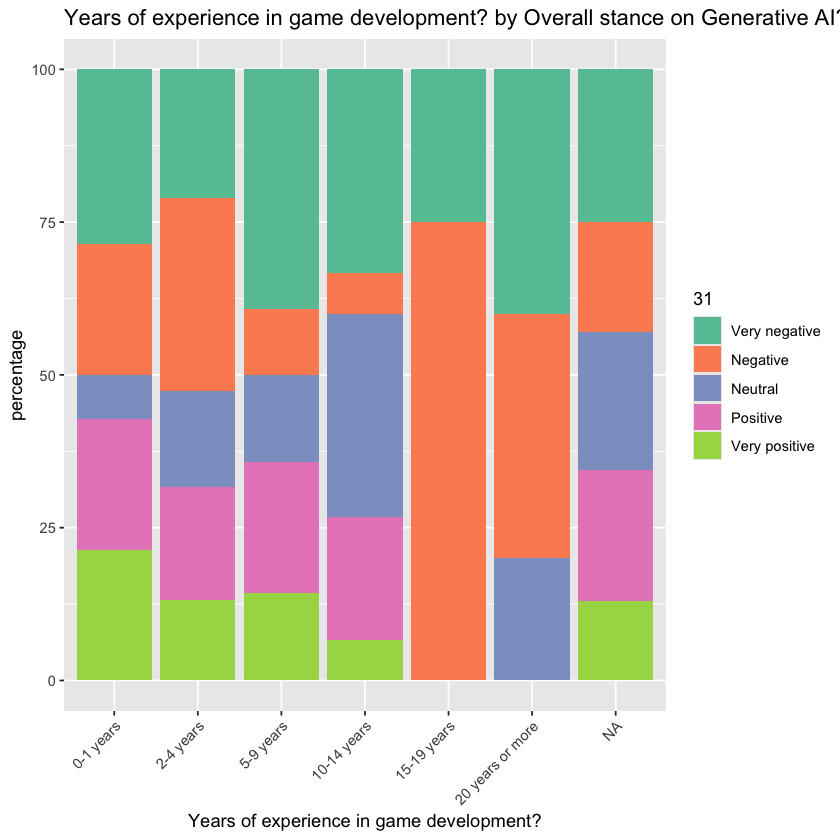

In [63]:
# Make a stacked barchart showing Years of experience in game development? by Column2 in percentages
# And order the x-axis from left to right "0-1 years, 2-4 years, 5-9 years, 10-14 years, 15-19 years, 20 years or more"
data %>%
  count(`24`, `31`) %>%
  group_by(`24`) %>%
  mutate(percentage = n / sum(n) * 100) %>%
  mutate(
    `Years of experience in game development?` = factor(`24`, levels = c(
      "0-1 years",
      "2-4 years",
      "5-9 years",
      "10-14 years",
      "15-19 years",
      "20 years or more"
    )),
    `31` = factor(`31`, levels = c("Very negative", "Negative", "Neutral", "Positive", "Very positive"))
  ) %>%
  ggplot(aes(
    x = `Years of experience in game development?`,
    y = percentage, fill = `31`
  )) +
  geom_bar(stat = "identity", position = "stack") +
  labs(title = "Years of experience in game development? by Overall stance on Generative AI?") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_brewer(palette = "Set2")


## Stance on GenAI

### Benefits of GenAI

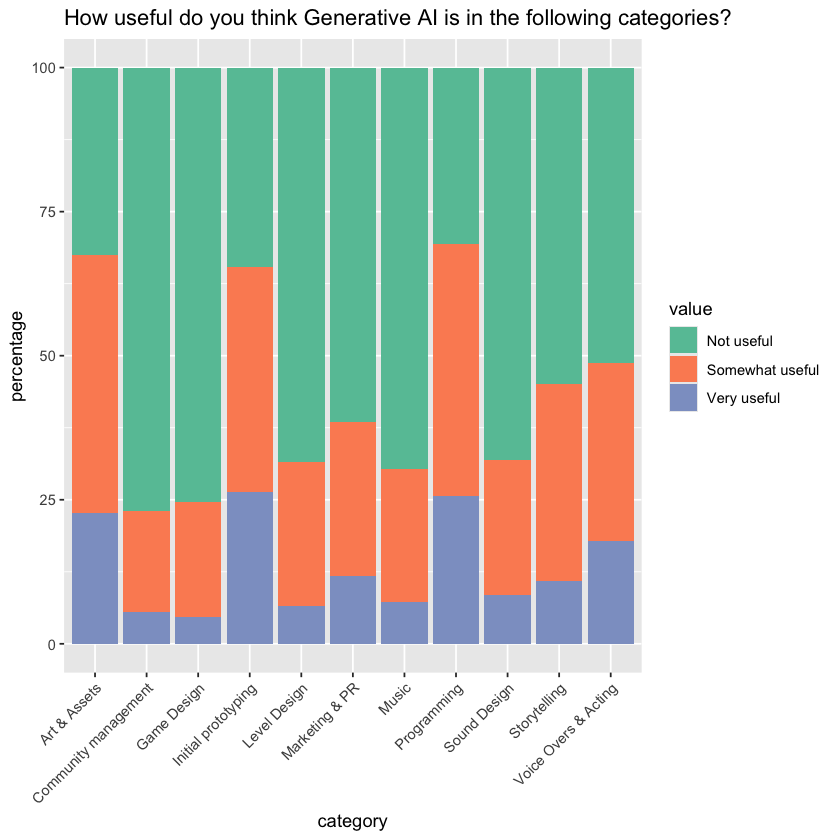

In [59]:
# A horizontal stacked bar chart showing the usefulnes of GenAI in different categories in percentages
# and exchanging the column number for the coresponding columnNames
data %>%
  count(
    `34`,
    `35`,
    `36`,
    `37`,
    `38`,
    `39`,
    `40`,
    `41`,
    `42`,
    `43`,
    `44`
  ) %>%
  gather(key = "category", value = "value", -n) %>%
  group_by(category) %>%
  mutate(percentage = n / sum(n) * 100) %>%
  mutate(category = columnNames[as.numeric(category)]) %>%
  ggplot(aes(
    x = category,
    y = percentage,
    fill = value
  )) +
  geom_bar(stat = "identity", position = "stack") +
  labs(title = "How useful do you think Generative AI is in the following categories?") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_brewer(palette = "Set2")

In [60]:
# show a top ten of the longest answer time by looking at "Start time" and "Completion time" and show the
data %>%
  mutate(
    `Start time` = as.POSIXct(`2`, format = "%Y-%m-%d %H:%M:%S"),
    `Completion time` = as.POSIXct(`3`, format = "%Y-%m-%d %H:%M:%S")
  ) %>%
  mutate(answer_time = `3` - `2`) %>%
  arrange(desc(answer_time)) %>%
  select(`2`, `3`, answer_time) %>%
  head(10)


2,3,answer_time
<dttm>,<dttm>,<drtn>
2024-04-13 02:32:51,2024-04-13 04:32:37,119.76667 mins
2024-03-27 11:47:26,2024-03-27 13:39:03,111.61667 mins
2024-03-27 11:34:55,2024-03-27 13:17:30,102.58333 mins
2024-03-27 12:56:46,2024-03-27 14:24:55,88.15000 mins
2024-03-27 19:57:00,2024-03-27 21:19:30,82.50000 mins
2024-03-28 00:07:37,2024-03-28 01:27:05,79.46667 mins
2024-03-27 19:09:30,2024-03-27 20:21:17,71.78333 mins
2024-03-27 16:04:30,2024-03-27 17:08:01,63.51667 mins
2024-04-03 10:49:05,2024-04-03 11:39:41,50.60000 mins
